In [1]:
# !pip install shap

In [2]:
import shap

import pickle
import pandas as pd

from scikitplot.estimators import plot_feature_importances
from customized_packages.customized_functions import load_prepared_data

### Load pre-trained model

In [3]:
with open('model_pkl', 'rb') as file:
    classifier = pickle.load(file)

In [4]:
classifier

RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       min_samples_leaf=15, min_samples_split=25,
                       n_estimators=600)

### Load processed data

In [5]:
# Load pre-processed data
X_train, X_test, y_train, y_test, feature_names = load_prepared_data()

In [6]:
train_df = pd.DataFrame(data = X_train, columns = feature_names)
test_df = pd.DataFrame(data = X_test, columns = feature_names)

In [7]:
train_df.head()

,balance,day,duration,campaign,previous,pdays_binary,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,poutcome_success,poutcome_unknown,age_group_20-29,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60-69,age_group_70-79,age_group_80-89,age_group_90-100
0,-0.525238,0.626894,0.023423,-0.118775,-0.425135,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.020817,-0.936431,0.041363,-0.909515,-0.425135,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.396755,-0.214896,-2.257882,2.415090,-0.425135,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.348411,0.506638,0.805465,-0.909515,-0.425135,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.166104,-0.335152,-0.013372,-0.118775,-0.425135,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature importances

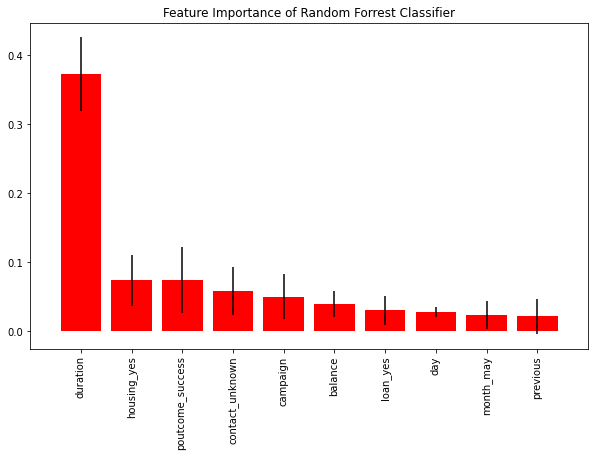

In [8]:
plot_feature_importances(
    classifier,
    title='Feature Importance of Random Forrest Classifier',
    feature_names=feature_names,
    max_num_features=10,
    order='descending',
    x_tick_rotation=90,
    figsize=(10,6));

### SHAP values for a sample

In [9]:
# Define an explainer
explainer = shap.TreeExplainer(classifier)

In [10]:
# Calculate Shap values
choosen_instance = test_df.iloc[[10]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

### SHAP summarize the effects of all the features

In [11]:
# calculate shap values for all test data
shap_values = explainer.shap_values(shap.sample(train_df, 200), approximate=False, check_additivity=False)

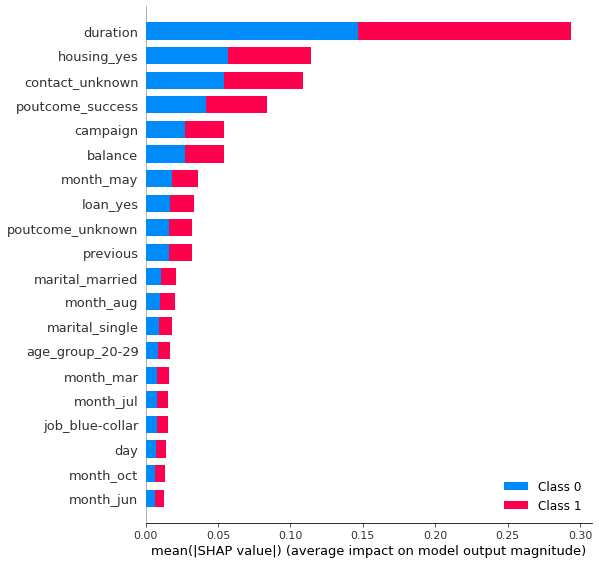

In [12]:
shap.summary_plot(shap_values, shap.sample(train_df, 200))

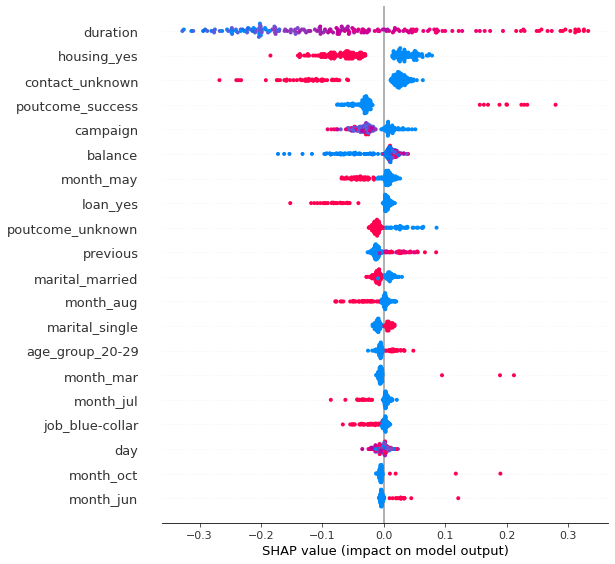

In [14]:
shap.summary_plot(shap_values[1], shap.sample(train_df, 200), color_bar=False)